
🔹 First few rows of dataset:
         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left

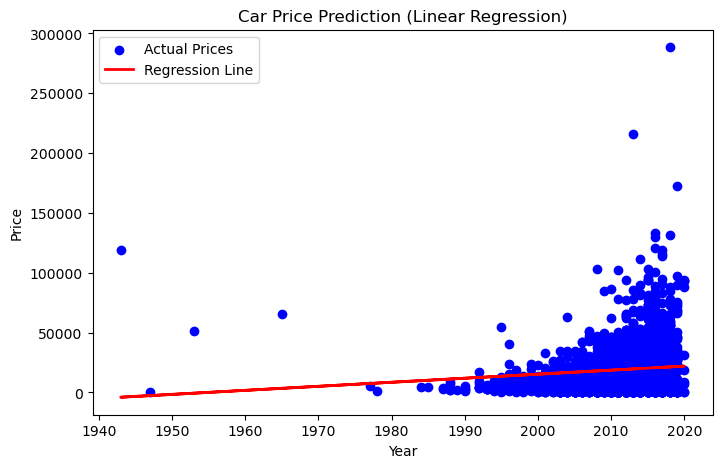

Intercept: 18940.45
Coefficients: [2066.66805215 1506.23445822]
R² Score: 0.0507
Mean Absolute Error (MAE): 11899.74
Mean Squared Error (MSE): 295792782.89

 Predicted Prices (Multiple Regression):
Year: 2015, Cylinders: 4 → Predicted Price: $19698.76
Year: 2020, Cylinders: 6 → Predicted Price: $24032.28
Year: 2023, Cylinders: 8 → Predicted Price: $27636.64


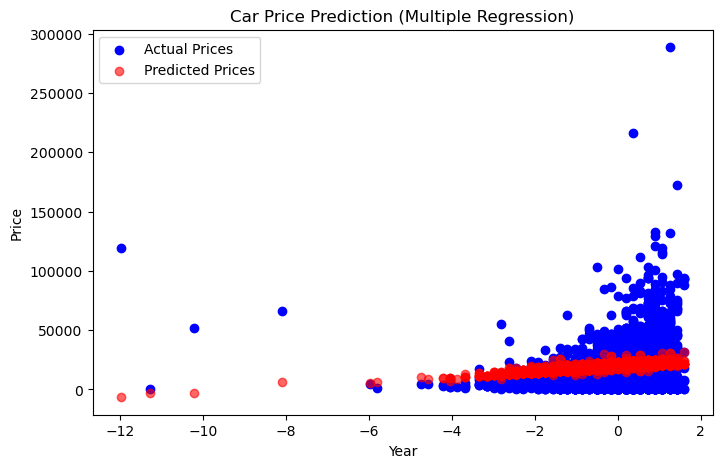

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "car_price_prediction.csv"
df = pd.read_csv(file_path)

# Display initial dataset information
print("\n🔹 First few rows of dataset:")
print(df.head())

print("\n🔹 Column names in dataset:")
print(df.columns)

# Clean column names (strip spaces, convert to lowercase)
df.columns = df.columns.str.strip().str.lower()
df = df.rename(columns={'prod. year': 'year'})  # Rename for consistency

# Check for missing values
print("\n🔹 Missing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['year', 'price', 'cylinders'])

# Ensure expected columns exist
expected_columns = ['year', 'price', 'cylinders']
if not all(col in df.columns for col in expected_columns):
    raise KeyError(f"Expected columns {expected_columns} not found. Available columns: {df.columns}")

################### LINEAR REGRESSION ###################


# Selecting features and target variable
X_linear = df[['year']]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_linear, y, test_size=0.2, random_state=42)

# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Model Coefficients
print(f"Intercept: {linear_model.intercept_:.2f}")
print(f"Slope: {linear_model.coef_[0]:.4f}")

# Performance Metrics
print(f"R² Score: {r2_score(y_test, y_pred_linear):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_linear):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear):.2f}")

# Predictions on Sample Data
sample_linear = pd.DataFrame({'year': [2015, 2020, 2023]})
predicted_prices_linear = linear_model.predict(sample_linear)

print("\n Predicted Prices (Linear Regression):")
for i, price in enumerate(predicted_prices_linear):
    print(f"Year: {sample_linear.iloc[i, 0]} → Predicted Price: ${price:.2f}")

# Plot Linear Regression
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Car Price Prediction (Linear Regression)")
plt.legend()
plt.show()

################### MULTIPLE REGRESSION ###################


# Selecting multiple features
X_multiple = df[['year', 'cylinders']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multiple)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predictions
y_pred_multi = multi_model.predict(X_test)

# Model Coefficients
print(f"Intercept: {multi_model.intercept_:.2f}")
print(f"Coefficients: {multi_model.coef_}")

# Performance Metrics
print(f"R² Score: {r2_score(y_test, y_pred_multi):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_multi):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_multi):.2f}")

# Predict new car prices
sample_multi = pd.DataFrame([[2015, 4], [2020, 6], [2023, 8]], columns=['year', 'cylinders'])
sample_scaled = scaler.transform(sample_multi)
predicted_prices_multi = multi_model.predict(sample_scaled)

print("\n Predicted Prices (Multiple Regression):")
for i, price in enumerate(predicted_prices_multi):
    print(f"Year: {sample_multi.iloc[i, 0]}, Cylinders: {sample_multi.iloc[i, 1]} → Predicted Price: ${price:.2f}")

# Scatter plot with regression trend
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Prices')
plt.scatter(X_test[:, 0], y_pred_multi, color='red', label='Predicted Prices', alpha=0.6)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Car Price Prediction (Multiple Regression)")
plt.legend()
plt.show()
